# Importing import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# reading dataset

In [2]:
# reading csv files using pandas 
df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\final_clean.csv")

In [3]:
df.head()

,Unnamed: 0,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday


# Identify the Outlier using Visualization

In [4]:
df.drop(columns= "Unnamed: 0", inplace = True)

In [5]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print(num_features)


Num of Numerical Features : 11
['store_nbr', 'sales', 'onpromotion', 'transferred', 'oil_price', 'cluster', 'transactions', 'year', 'month', 'week', 'quarter']


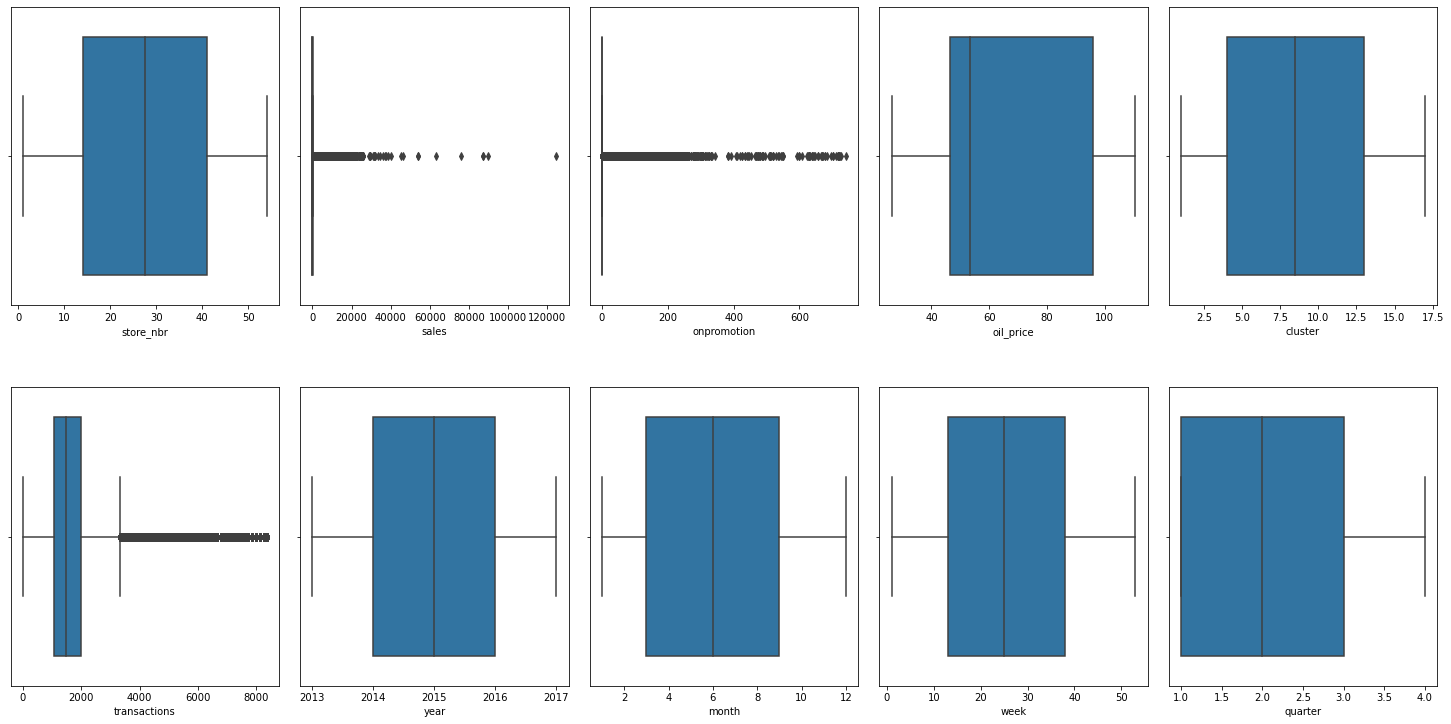

In [6]:

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_features:
    if col != "transferred":
        
        sns.boxplot(x=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Observation**
* Transcations, sales, onPromotion has outliers

In [7]:
obj = [feature for feature in df.columns if df[feature].dtype == 'O'] +['transferred']

def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
x = df.drop(obj,axis = 1)
for i in x.columns:
    count_outliers(x,i)
    print("------------------------------------------------------------")

No outliers in store_nbr
------------------------------------------------------------
There are outliers in sales
Count of outliers are: 455506
------------------------------------------------------------
There are outliers in onpromotion
Count of outliers are: 625820
------------------------------------------------------------
No outliers in oil_price
------------------------------------------------------------
No outliers in cluster
------------------------------------------------------------
There are outliers in transactions
Count of outliers are: 216810
------------------------------------------------------------
No outliers in year
------------------------------------------------------------
No outliers in month
------------------------------------------------------------
No outliers in week
------------------------------------------------------------
No outliers in quarter
------------------------------------------------------------


# Using Z Score

### 2 .  Z-score  method
#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

In [8]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [9]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [10]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]
num_df.drop(columns="transferred", inplace = True)
num_df.head()

,store_nbr,sales,onpromotion,oil_price,cluster,transactions,year,month,week,quarter
0,1,0.0,0,NaN,13,1697.071441,2013,1,1,1
1,1,0.0,0,NaN,13,1697.071441,2013,1,1,1
2,1,0.0,0,NaN,13,1697.071441,2013,1,1,1
3,1,0.0,0,NaN,13,1697.071441,2013,1,1,1
4,1,0.0,0,NaN,13,1697.071441,2013,1,1,1


In [11]:
replace_with_thresholds(num_df, num_df.columns)

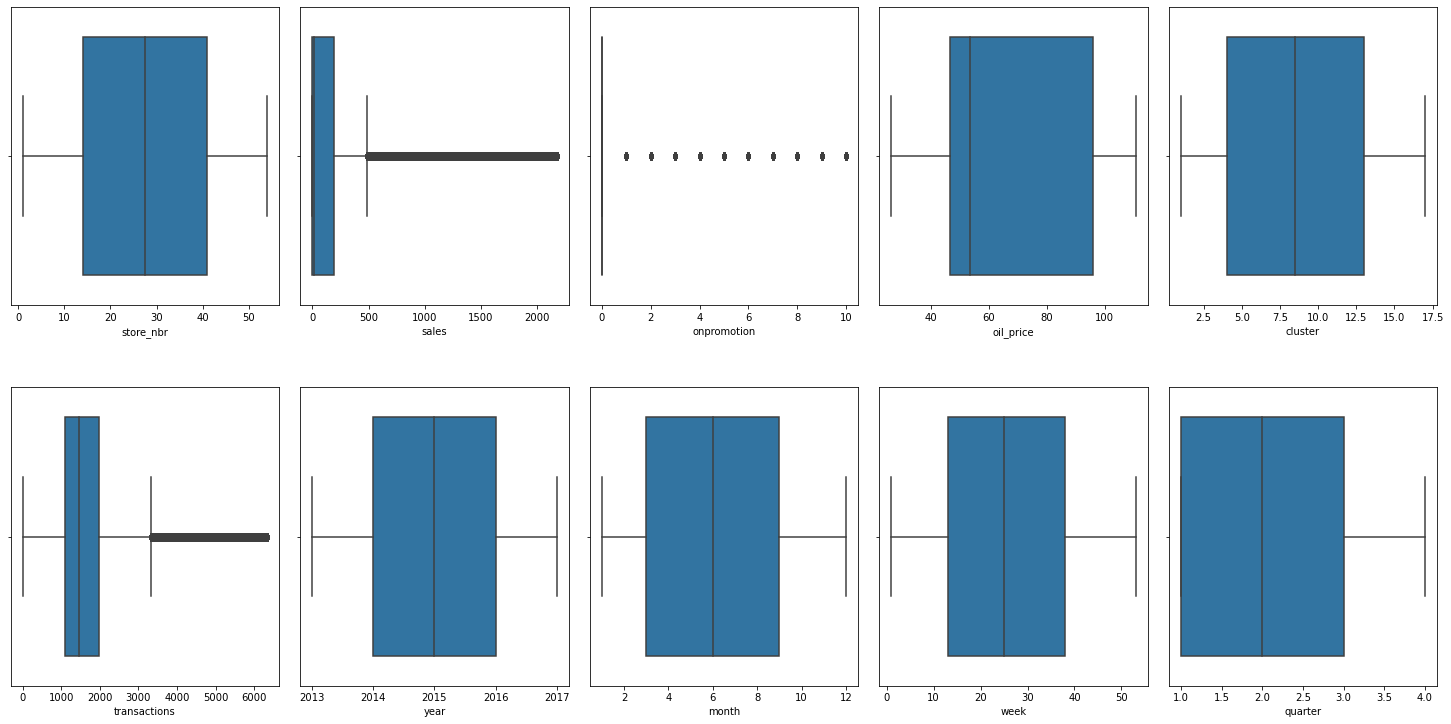

In [12]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_features:
    if col != "transferred":
        
        sns.boxplot(x=col, data=num_df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# 3. Using IQR Method

In [13]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
   
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    print("*******************************************************************************************************")
    return df1[df1[col] > upper_limit]

In [14]:
for i in num_features:
    if i != "transferred":
        print(i)
        remove_outliers_IQR(i)

store_nbr
percentile25 14.0
percentile75 41.0
Upper limit 81.5
Lower limit -26.5
*******************************************************************************************************
sales
percentile25 0.0
percentile75 196.011
Upper limit 490.02750000000003
Lower limit -294.0165
*******************************************************************************************************
onpromotion
percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0
*******************************************************************************************************
oil_price
percentile25 46.32
percentile75 95.78
Upper limit 169.97
Lower limit -27.869999999999997
*******************************************************************************************************
cluster
percentile25 4.0
percentile75 13.0
Upper limit 26.5
Lower limit -9.5
*******************************************************************************************************
transactions
percentile25 1084.0
percentile75 19

In [15]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    
    
    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

-------------------------------store_nbr--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


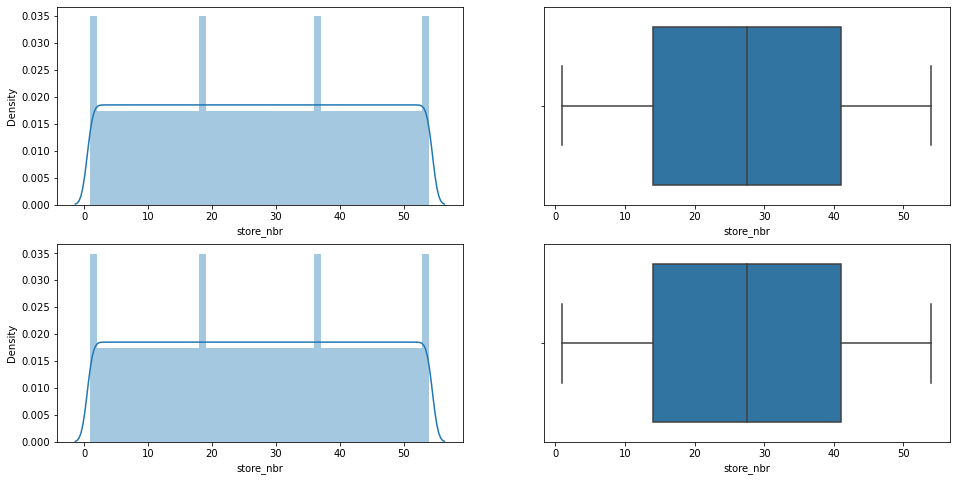

-------------------------------sales--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


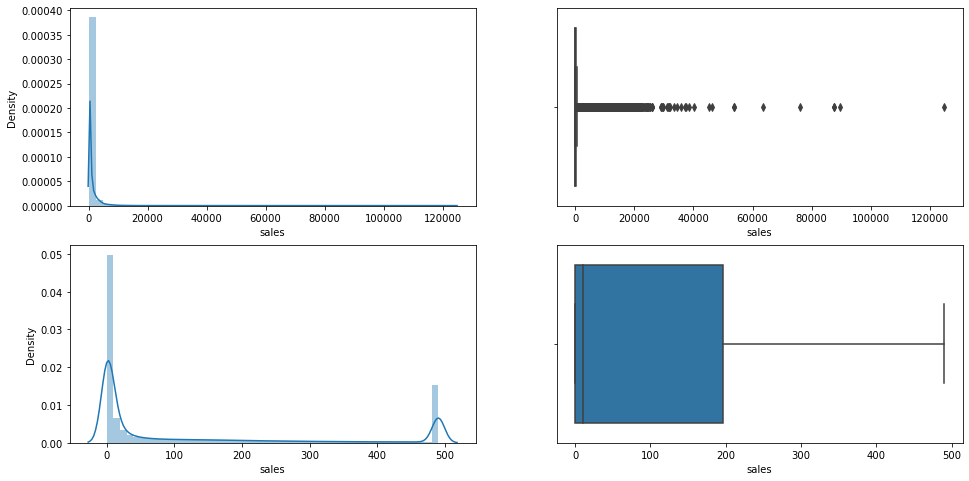

-------------------------------onpromotion--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


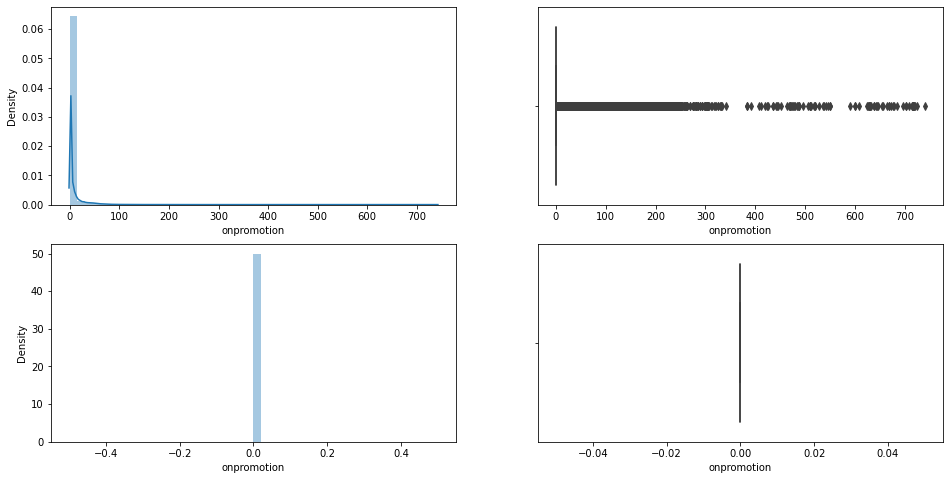

-------------------------------oil_price--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


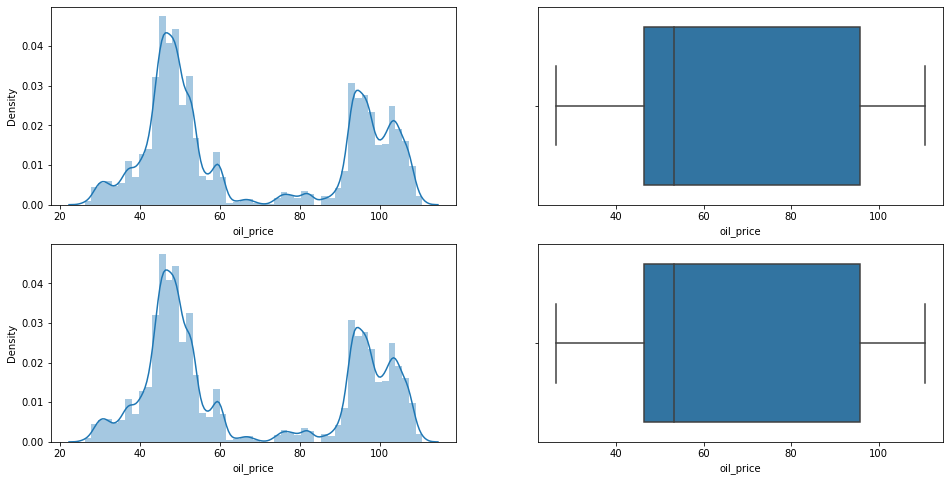

-------------------------------cluster--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


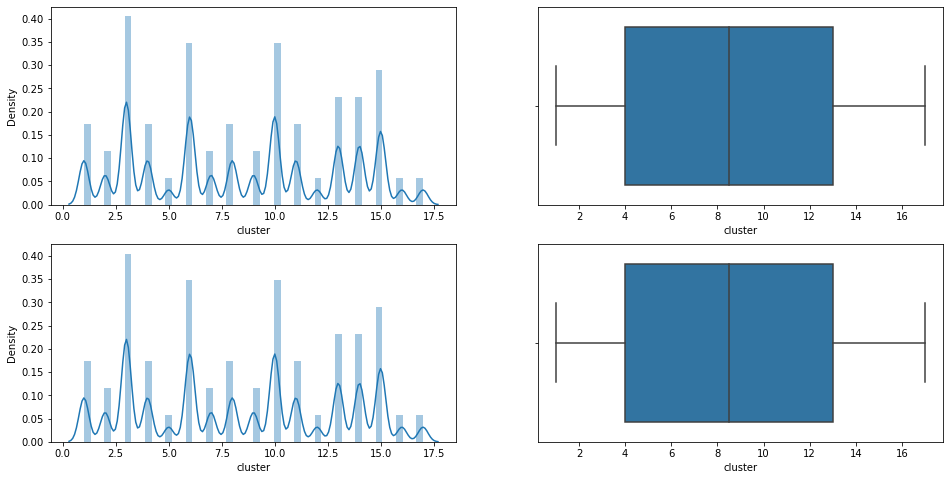

-------------------------------transactions--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


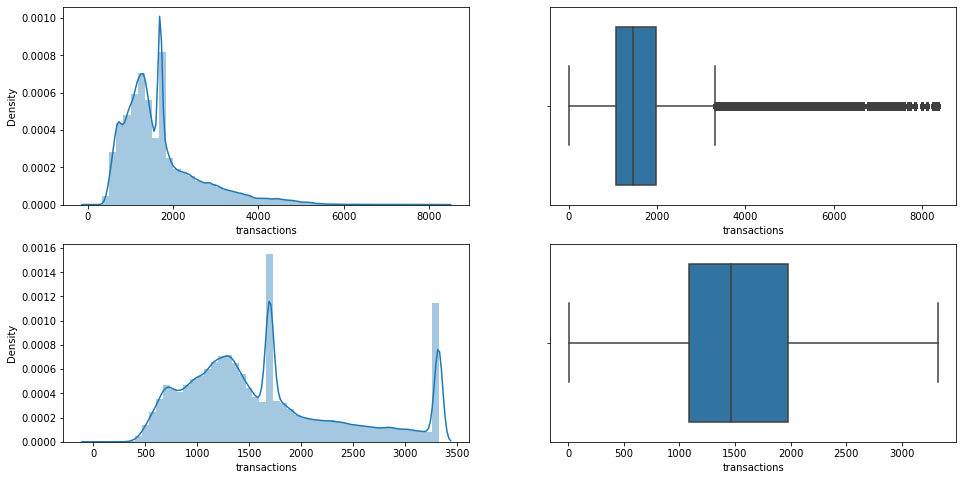

-------------------------------year--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


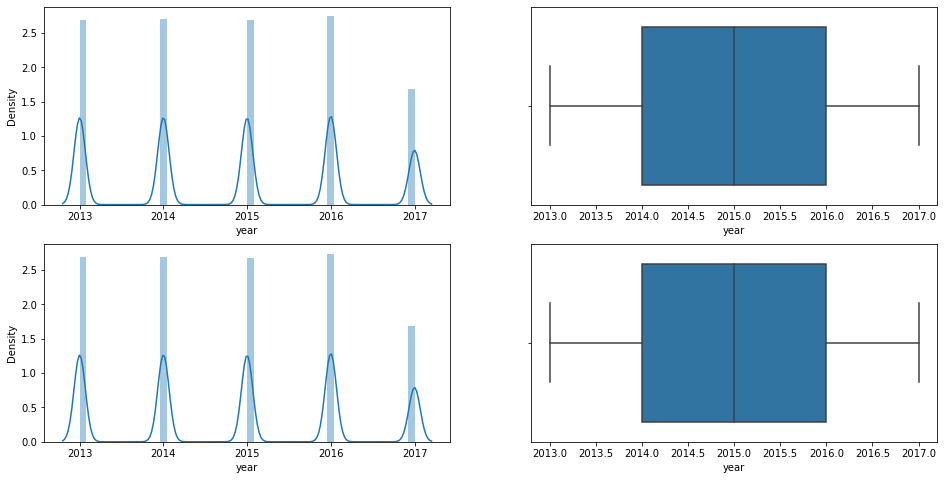

-------------------------------month--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


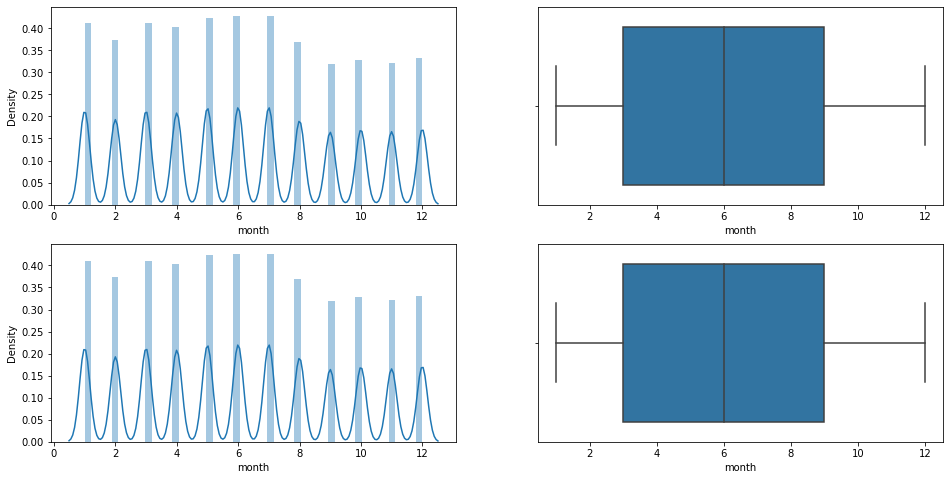

-------------------------------week--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


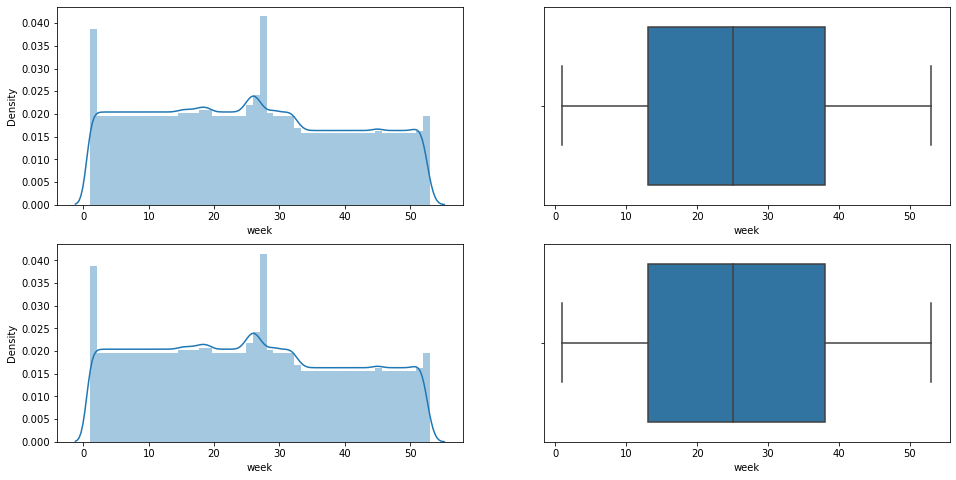

-------------------------------quarter--------------------------
--------------------Before-----------------------------------
---------------------After-------------------------------------


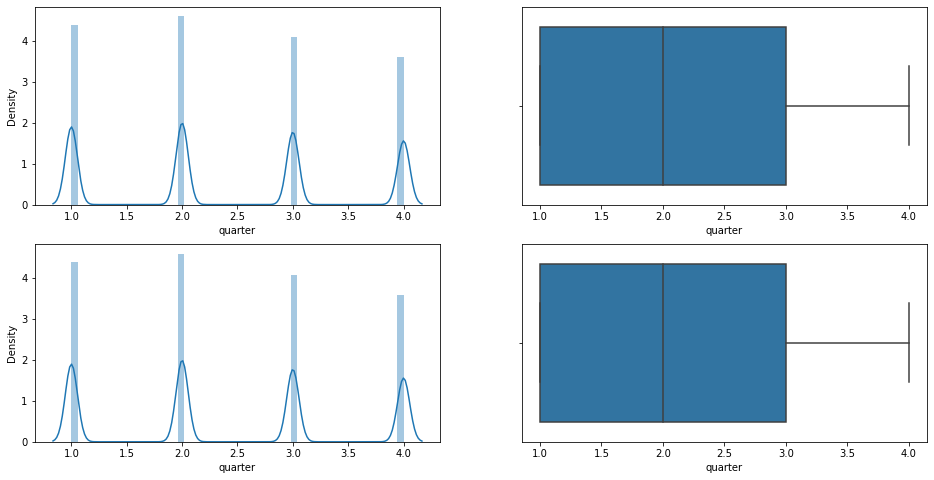

In [16]:
for i in num_features:
    if i != "transferred":
        print(f"-------------------------------{i}--------------------------")
        create_comparison_plot(df,df1,i)

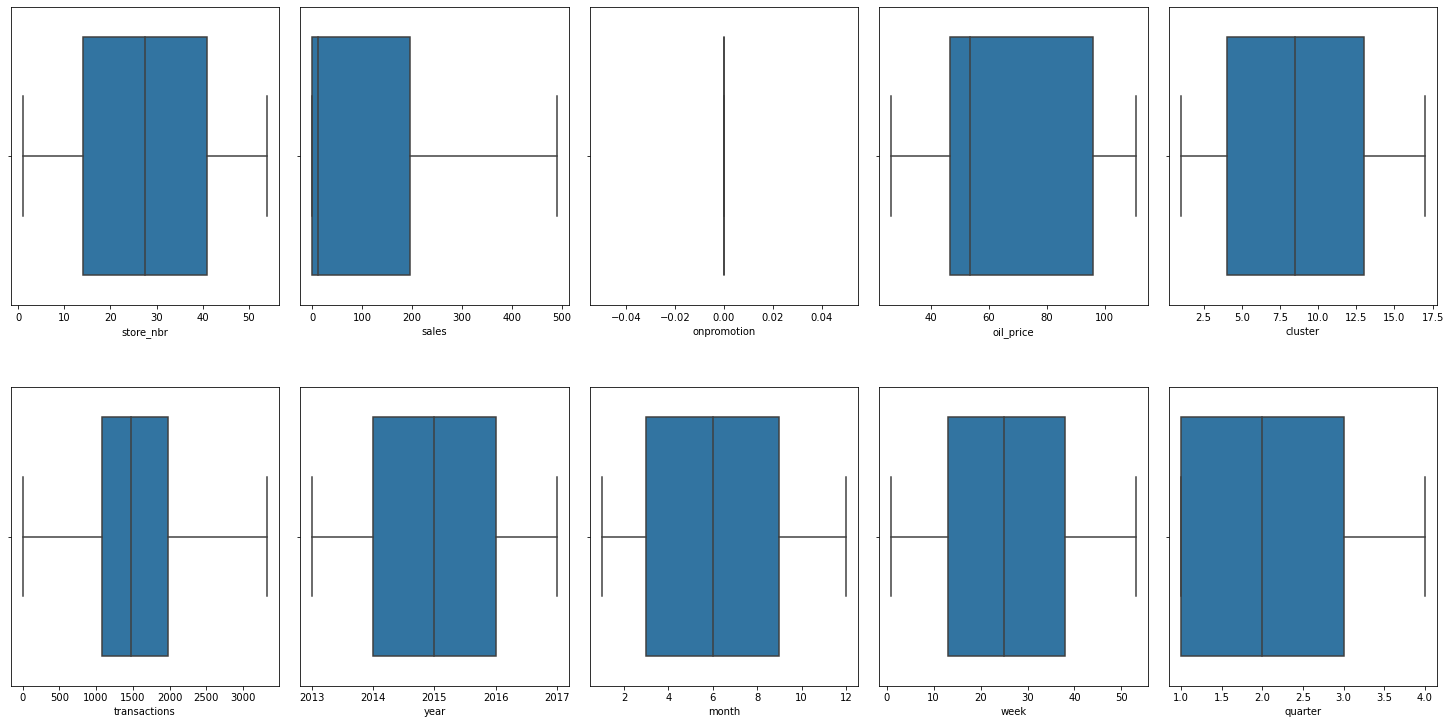

In [18]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_features:
    if col != "transferred":
        
        sns.boxplot(x=col, data=df1, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [19]:
# Saving clean data frame 
df.to_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\outlier_clean.csv")